In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# 현재경로 확인
os.getcwd()

'/Users/crystal.moon/crystal.moon/00_FastCam/Part 05~11) Machine Learning/06. 회귀분석/실습코드'

In [6]:
# 데이터 불러오기
cor = pd.read_csv('data/ToyotaCorolla.csv')
cor

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [10]:
# 데이터 수와 변수의 수 확인하기
cor.shape

(1436, 37)

## 범주형 변수를 이진형 변수로 변환

In [13]:
## 가변수 생성
cor.Fuel_Type.unique()
dummy_p = np.repeat(0,cor.shape[0])
dummy_d = np.repeat(0,cor.shape[0])
dummy_c = np.repeat(0,cor.shape[0])
dummy_c #0이 1436개 반복

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
p_idx = np.array(cor.Fuel_Type == 'Petrol')
d_idx = np.array(cor.Fuel_Type == 'Diesel')
c_idx = np.array(cor.Fuel_Type == 'CNG')
p_idx

array([False, False, False, ...,  True,  True,  True])

In [20]:
dummy_p[p_idx] = 1 #True 값에 1 넣어주기
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

In [19]:
dummy_p

array([0, 0, 0, ..., 1, 1, 1])

## 불필요한 변수 제거 및 가변수 추가


In [22]:
Fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG': dummy_c})

In [23]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [33]:
cor_ = cor.drop(['Id', 'Model', 'Fuel_Type'],axis=1, inplace=False)
mlr_data = pd.concat([cor_, Fuel], axis=1)
mlr_data

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,0,1,1,1,0,0,0,1,0,0
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,0,0,1,1,0,0,0,1,0,0
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,0,0,0,1,0,0,0,1,0,0
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,1,0,0,0,1,0,0


In [34]:
# bias 추가
mlr_data2 = sm.add_constant(mlr_data, has_constant='add')
mlr_data2.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [38]:
#price 제외하고 가져오기
feature_columns = list(mlr_data2.columns.difference(['Price']))
print(feature_columns)

['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']


In [57]:
X = mlr_data2[feature_columns]
y = mlr_data2.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [60]:
# Train the MLR / 회귀모델적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [61]:
 ## R2가 높고, 대부분의 변수들이 유의
fitted_full_model.summary()
# 변수들이 많아서 다중공선성이 존재할텐데 절반정도의 변수들의 p-value가 유의하게 나옴

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     326.7
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:19:56   Log-Likelihood:                -8407.8
No. Observations:                1005   AIC:                         1.688e+04
Df Residuals:                     971   BIC:                         1.705e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS                -65.2948    128.451     -0.508      0.611    -317.369     186.780
Age_08_04         -114.9117      3.994    -28.772      0.000    -122.749    -107.074
Airbag_1           128.5114    259.347      0.496      0.620    -380.434     637.457
Airbag_2          -271.5066    131.724     -2.061      0.040    -530.003     -13.010
Airco              234.3522     93.016      2.519      0.012      51.817     416.887
Automatic          422.0972    166.231      2.539      0.011      95.883     748.311
Automatic_airco   2107.6261    193.940     10.867      0.000    1727.037    2488.215
BOVAG_Guarantee    259.3959    127.005      2.042      0.041      10.160     508.632
Backseat_Divider   -97.7759    132.616     -0.737      0.461    -358.022     162.470
Boardcomputer     -164.8142    120.356     -1.369      0.171    -401.002      71.374
CD_Player          181.0261    101.033      1.792      0.073     -17.241     379.293
CNG              -1873.4933    260.287     -7.198      0.000   -2384.283   -1362.703
Central_Lock      -256.7754    152.477     -1.684      0.092    -555.998      42.447
Cylinders           -0.0275      0.002    -11.568      0.000      -0.032      -0.023
Diesel            1895.4583    307.351      6.167      0.000    1292.310    2498.606
Doors               24.9203     40.819      0.611      0.542     -55.184     105.025
Gears             -144.5746    214.257     -0.675      0.500    -565.035     275.886
Guarantee_Period    58.6135     13.509      4.339      0.000      32.103      85.124
HP                  53.4341      5.891      9.070      0.000      41.873      64.996
KM                  -0.0164      0.001    -12.249      0.000      -0.019      -0.014
Met_Color          -51.0791     76.174     -0.671      0.503    -200.563      98.405
Metallic_Rim       200.4554     94.349      2.125      0.034      15.305     385.606
Mfg_Month          -86.4643     10.255     -8.432      0.000    -106.588     -66.340
Mfg_Year             2.9811      0.939      3.176      0.002       1.139       4.823
Mfr_Guarantee      269.7354     74.497      3.621      0.000     123.543     415.928
Mistlamps           50.5116    110.460      0.457      0.648    -166.255     267.279
Petrol             -21.9719    237.323     -0.093      0.926    -487.696     443.752
Power_Steering    -297.7099    286.732     -1.038      0.299    -860.396     264.976
Powered_Windows    588.4796    152.152      3.868      0.000     289.895     887.065
Quarterly_Tax       10.9773      1.898      5.785      0.000       7.253      14.701
Radio              866.4875    771.447      1.123      0.262    -647.409    2380.384
Radio_cassette    -981.0563    772.349     -1.270      0.204   -2496.722     534.609
Sport_Model        293.8979     89.646      3.278      0.001     117.976     469.819
Tow_Bar            -83.

## VIF를 통한 다중공선성 확인 

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data2.values, i) for i in range(mlr_data2.shape[1])]
vif["features"] = mlr_data2.columns
vif

#inf - 무한대 : 아주 크다는 뜻
# age -> inf(다중공선성이 매우 심하다) but p-value는 0.000 유의하다 
# 제거해야할까? -> 제거하지 않는것이 맞다

#Radio, Radio_cassette -> 다중공선성

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


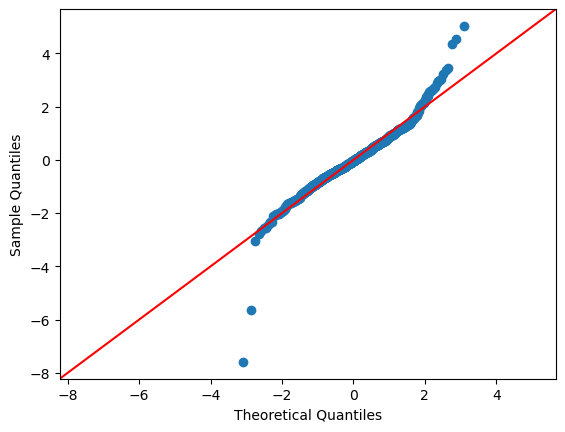

In [63]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid
# q-q plot # 정규분포 확인 -> 잔차가 얼마나 정규분포를 따르는가
fig = sm.qqplot(res, fit=True, line='45')
# y = ax 꼴을 띄어야 하는데 휘었음

Text(0, 0.5, 'Residual')

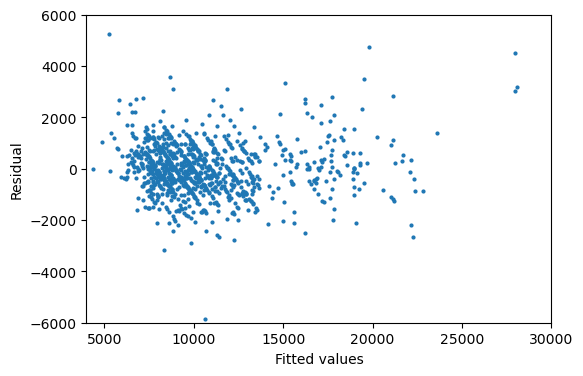

In [64]:
# residual pattern 확인
import matplotlib.pyplot as plt
pred_y = fitted_full_model.predict(train_x)
plt.figure(figsize=(6,4))
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.ylim(-6000,6000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [65]:
 ## 검증 데이터에 대한 예측 
pred_y2 = fitted_full_model.predict(test_x)

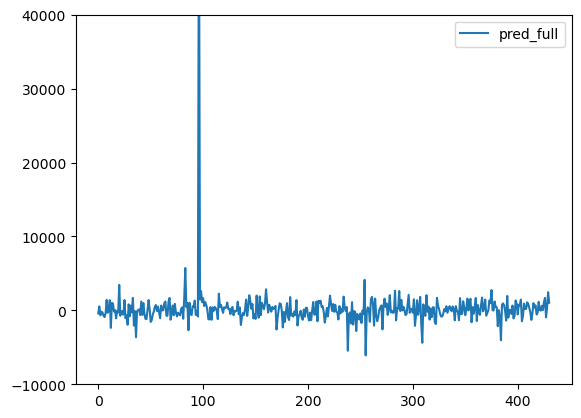

In [66]:
## 잔차 plot
plt.plot(np.array(test_y-pred_y2),label="pred_full")
plt.ylim(-10000,40000)
plt.legend()
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
## MSE 성능
mean_squared_error(y_true=test_y, y_pred=pred_y2)

9341291.519664854

# 변수선택법

In [69]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x31089d310>, 'AIC': 19032.307055780595}


In [70]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x31089d310>,
 'AIC': 16883.558901978366}

In [71]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k): #k는 변수의 수
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 0.2514660358428955 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17508.844905
Name: 211, dtype: object


In [72]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [73]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.025073766708374023 seconds.
Processed  630 models on 2 predictors in 0.24523282051086426 seconds.
Processed  7140 models on 3 predictors in 3.0905659198760986 seconds.
Total elapsed time: 3.406385898590088 seconds.


In [74]:
models

,AIC,model
1,17774.182459,<statsmodels.regression.linear_model.Regressio...
2,17508.844905,<statsmodels.regression.linear_model.Regressio...
3,17279.692937,<statsmodels.regression.linear_model.Regressio...


In [75]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     2231.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:24:29   Log-Likelihood:                -8635.8
No. Observations:                1005   AIC:                         1.728e+04
Df Residuals:                    1001   BIC:                         1.730e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0250      0.001    -18.323      0.000      -0.028      -0.022
Mfg_Year    1442.0637     36.861     39.122      0.000    1369.730    1514.397
Weight        20.1846      0.922     21.889      0.000      18.375      21.994
const      -2.893e+06   7.32e+04    -39.505      0.000   -3.04e+06   -2.75e+06
==============================================================================
Omnibus:                      190.340   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2643.611
Skew:                          -0.421   Prob(JB):                         0.00
Kurtosis:                      10.901   Cond. No.                     1.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.91737
full model AIC:  16883.55890
full model MSE:  13103379.74014
selected model Rsquared:  0.86991
selected model AIC:  17279.69294
selected model MSE:  13103379.74014


/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/3467645078.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/3467645078.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row[1].params.shape[0])/fitted_full_model.mse_total
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/3467645078.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

Text(0, 0.5, 'BIC')

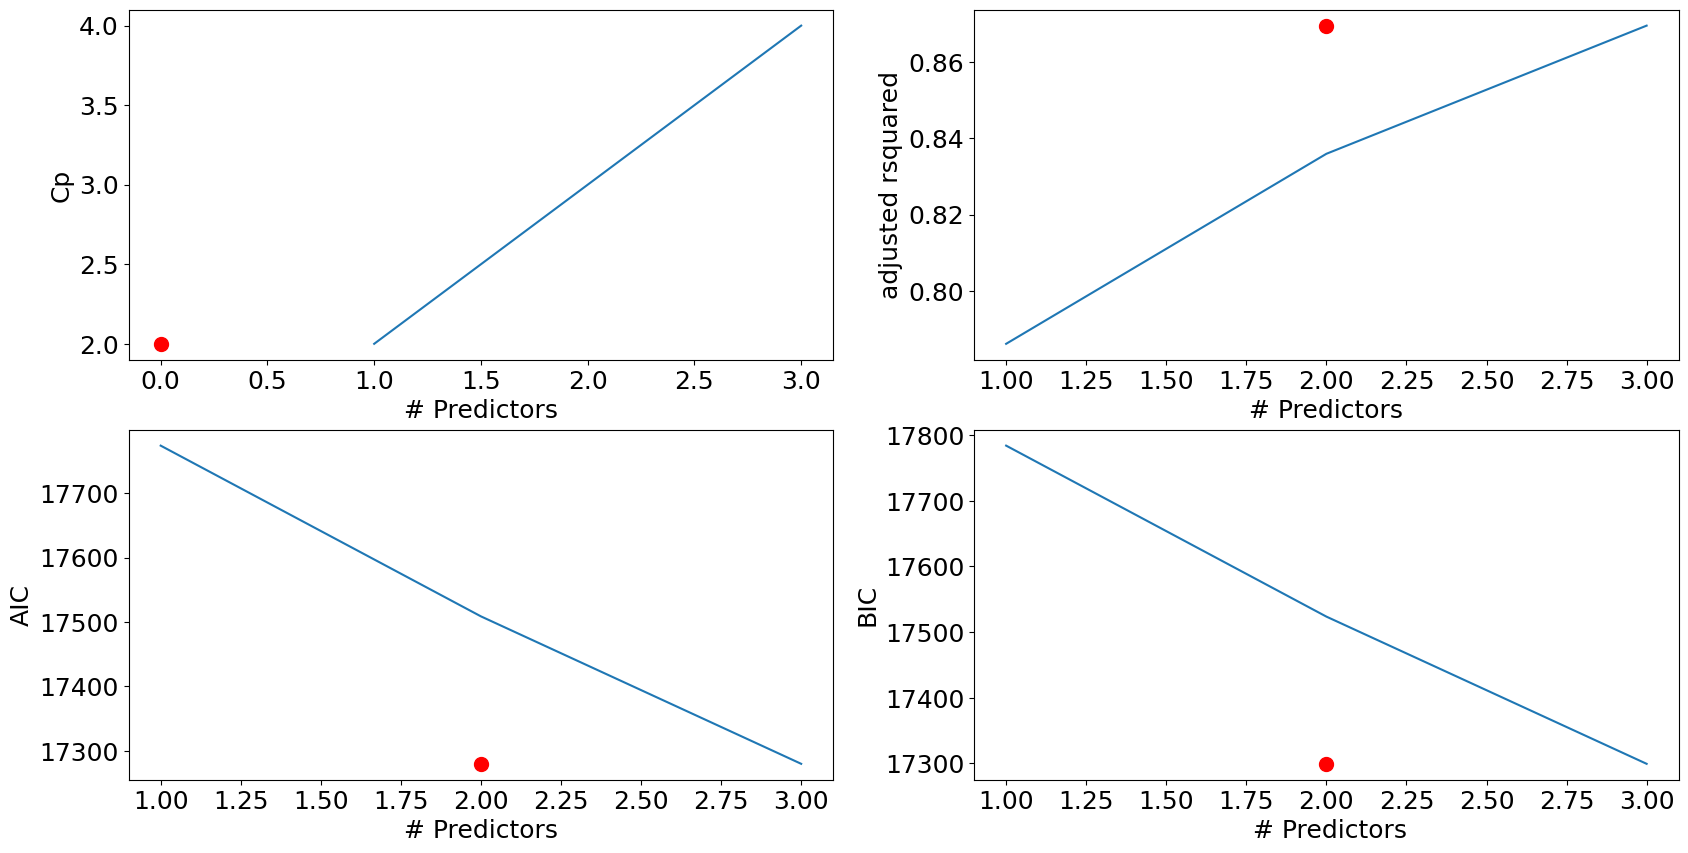

In [77]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [78]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [79]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [80]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.026448965072631836
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310d23cd0>
Processed  35 models on 2 predictors in 0.017368078231811523
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310d1be10>
Processed  34 models on 3 predictors in 0.014667034149169922
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310d03150>
Processed  33 models on 4 predictors in 0.014141082763671875
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310d42f50>
Processed  32 models on 5 predictors in 0.01424407958984375
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'c

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

Processed  25 models on 12 predictors in 0.05295896530151367
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310d1b750>
Processed  24 models on 13 predictors in 0.033506155014038086
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310d39150>
Processed  23 models on 14 predictors in 0.03004908561706543
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'const']  AIC: <statsmodels.regression.linear_model.Regress

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

Processed  18 models on 19 predictors in 0.04008603096008301
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310cefb50>
Processed  17 models on 20 predictors in 0.024791955947875977
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310d4b6d0>
Processed  16 models on 21 predictors in 0.027491092681884766
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

In [81]:
Forward_best_model.aic

16870.01845316039

In [82]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     470.2
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:01:22   Log-Likelihood:                -8411.0
No. Observations:                1005   AIC:                         1.687e+04
Df Residuals:                     981   BIC:                         1.699e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1018.8930    122.098      8.345      0.000     779.290    1258.496
Automatic_airco   2151.3417    181.961     11.823      0.000    1794.265    2508.419
Weight              12.1269      1.243      9.752      0.000       9.687      14.567
KM                  -0.0164      0.001    -12.346      0.000      -0.019      -0.014
HP                  52.2082      5.533      9.435      0.000      41.350      63.066
Powered_Windows    566.3459    149.569      3.787      0.000     272.834     859.858
Mfr_Guarantee      258.3013     73.240      3.527      0.000     114.577     402.026
Guarantee_Period    61.6341     12.774      4.825      0.000      36.567      86.701
Sport_Model        251.4328     82.450      3.050      0.002      89.635     413.230
Quarterly_Tax       10.8207      1.769      6.117      0.000       7.349      14.292
cc                  -4.0307      0.528     -7.634      0.000      -5.067      -2.995
CNG              -4.105e+04   4712.524     -8.711      0.000   -5.03e+04   -3.18e+04
Diesel           -3.733e+04   4706.994     -7.930      0.000   -4.66e+04   -2.81e+04
Airco              245.7660     89.537      2.745      0.006      70.060     421.472
Airbag_2          -345.4072     98.352     -3.512      0.000    -538.412    -152.402
Age_08_04          -30.4022     10.131     -3.001      0.003     -50.283     -10.522
Automatic          422.5950    163.613      2.583      0.010     101.523     743.667
Metallic_Rim       193.5509     88.488      2.187      0.029      19.904     367.198
BOVAG_Guarantee    251.1381    122.311      2.053      0.040      11.118     491.159
CD_Player          176.3515     98.903      1.783      0.075     -17.735     370.438
Central_Lock      -238.1642    149.906     -1.589      0.112    -532.337      56.008
Boardcomputer     -179.4974    117.334     -1.530      0.126    -409.752      50.757
Radio_cassette    -149.0021    101.720     -1.465      0.143    -348.616      50.611
Cylinders        -4.703e+05   5.64e+04     -8.333      0.000   -5.81e+05    -3.6e+05
Petrol           -3.919e+04   4710.593     -8.319      0.000   -4.84e+04   -2.99e+04
const            -1.176e+05   1.41e+04     -8.333      0.000   -1.45e+05   -8.99e+04
==============================================================================
Omnibus:                      135.175   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1434.259
Skew:                          -0.123   Prob(JB):                         0.00
Kurtosis:                       8.847   Cond. No.                     1.14e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.64e-20. Thi

# 후진소거법

In [83]:
######## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [84]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [85]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.10520195960998535
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310cd5990>
Processed  35 models on 34 predictors in 0.09957075119018555
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

Processed  33 models on 32 predictors in 0.1274402141571045
Selected predictors: ['Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310d2ed10>
Processed  32 models on 31 predictors in 0.07810306549072266
Selected predictors: ['Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Petrol', 'Power_Steering', 'Powered_Windows', 

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

Processed  30 models on 29 predictors in 0.14735889434814453
Selected predictors: ['Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310d55b90>
Processed  29 models on 28 predictors in 0.1033790111541748
Selected predictors: ['Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Mo

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )


Processed  28 models on 27 predictors in 0.11120915412902832
Selected predictors: ['Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio_cassette', 'Sport_Model', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310ce0250>


/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )


Processed  27 models on 26 predictors in 0.2522711753845215
Selected predictors: ['Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Petrol', 'Powered_Windows', 'Quarterly_Tax', 'Radio_cassette', 'Sport_Model', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310c9b4d0>
Processed  26 models on 25 predictors in 0.10994935035705566
Selected predictors: ['Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Powered_Windows', 'Quarterly_Tax', 'Radio_cassette', 'Sport_Model', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.R

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )


Processed  25 models on 24 predictors in 0.1319139003753662
Selected predictors: ['Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Year', 'Mfr_Guarantee', 'Powered_Windows', 'Quarterly_Tax', 'Radio_cassette', 'Sport_Model', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310c9ac50>
Processed  24 models on 23 predictors in 0.10654592514038086
Selected predictors: ['Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Diesel', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Year', 'Mfr_Guarantee', 'Powered_Windows', 'Quarterly_Tax', 'Radio_cassette', 'Sport_Model', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310ca7b10>
To

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )


In [86]:
Backward_best_model.aic

16870.0184531604

# 단계적 선택법

In [87]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [88]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.025496244430541992
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310cc5e50>
forward
Processed  1 models on 0 predictors in 0.0010387897491455078
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x33af30550>
Processed  35 models on 2 predictors in 0.0157928466796875
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310ce0550>
forward
Processed  2 models on 1 predictors in 0.0009510517120361328
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x33aedd4d0>
Processed  34 models on 3 predictors in 0.013999223709106445
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrappe

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

Processed  26 models on 11 predictors in 0.05102801322937012
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310c9f010>
forward
Processed  11 models on 10 predictors in 0.016277790069580078
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310cccbd0>
Processed  25 models on 12 predictors in 0.0345611572265625
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310cae290>
forward
Pr

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

Processed  15 models on 14 predictors in 0.03570675849914551
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310ca4a50>
Processed  21 models on 16 predictors in 0.030083179473876953
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310d20990>
forward
Processed  16 models on 15 predictors in 0.021648883819580078
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

Processed  18 models on 19 predictors in 0.0380101203918457
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310ca7210>
forward
Processed  19 models on 18 predictors in 0.05209088325500488
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x33af339d0>
Processed  17 models on 20 predictors in 0.05910968780517578
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows',

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

Processed  21 models on 20 predictors in 0.06195473670959473
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310d13450>
Processed  15 models on 22 predictors in 0.05815577507019043
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'Central_Lock', 'Boardcomputer', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310cb67d0>
forward


/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )


Processed  22 models on 21 predictors in 0.23006701469421387
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'Central_Lock', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310cae210>
Processed  14 models on 23 predictors in 0.08645105361938477
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'Central_Lock', 'Boardcomputer', 'Radio_cassette', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310c9a010>
forward
Processed  23 models on 22 predictors in 

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

Processed  13 models on 24 predictors in 0.04505205154418945
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'Central_Lock', 'Boardcomputer', 'Radio_cassette', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310d5cf90>
forward
Processed  24 models on 23 predictors in 0.07454586029052734
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'Central_Lock', 'Boardcomputer', 'Radio_cassette', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310d

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

Processed  25 models on 24 predictors in 0.12431788444519043
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'Central_Lock', 'Boardcomputer', 'Radio_cassette', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310ca5190>
Processed  11 models on 26 predictors in 0.04022383689880371
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'Central_Lock', 'Boardcomputer', 'Radio_cassette', 'Cylinders', 'Petrol', 'Mfg_Month', 'const']  AIC: <statsmodels.regression.linear_model.RegressionRes

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

Processed  26 models on 25 predictors in 0.13354706764221191
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'Central_Lock', 'Boardcomputer', 'Radio_cassette', 'Cylinders', 'Petrol', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310c98390>
backward
Processed  11 models on 26 predictors in 0.039266109466552734
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'Central_Lock', 'Boardcomputer', 'Radio_cassette', 'Cylinders', 'Petrol', 'Mfg_Month', 'const']  AIC: <statsmodels.regression.linear

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

Processed  11 models on 26 predictors in 0.05277299880981445
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'Central_Lock', 'Boardcomputer', 'Radio_cassette', 'Cylinders', 'Petrol', 'Mfg_Month', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310ca79d0>
forward
Processed  26 models on 25 predictors in 0.07104873657226562
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'Central_Lock', 'Boardcomputer', 'Radio_cassette', 'Cylinders', 'Petrol', 'const']  AIC: <statsmodels.regression.linear_m

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

Processed  26 models on 25 predictors in 0.12837910652160645
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'Central_Lock', 'Boardcomputer', 'Radio_cassette', 'Cylinders', 'Petrol', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310c9b950>
backward
Processed  11 models on 26 predictors in 0.06116771697998047
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'Central_Lock', 'Boardcomputer', 'Radio_cassette', 'Cylinders', 'Petrol', 'Mfg_Month', 'const']  AIC: <statsmodels.regression.linear_

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

Processed  26 models on 25 predictors in 0.1488199234008789
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'Central_Lock', 'Boardcomputer', 'Radio_cassette', 'Cylinders', 'Petrol', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310d004d0>
backward
Processed  11 models on 26 predictors in 0.027065038681030273
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'Central_Lock', 'Boardcomputer', 'Radio_cassette', 'Cylinders', 'Petrol', 'Mfg_Month', 'const']  AIC: <statsmodels.regression.linear_

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

Processed  26 models on 25 predictors in 0.14530110359191895
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'Central_Lock', 'Boardcomputer', 'Radio_cassette', 'Cylinders', 'Petrol', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310ca4990>
backward
Processed  11 models on 26 predictors in 0.028415918350219727
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'Central_Lock', 'Boardcomputer', 'Radio_cassette', 'Cylinders', 'Petrol', 'Mfg_Month', 'const']  AIC: <statsmodels.regression.linear

/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/2229600772.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

Processed  26 models on 25 predictors in 0.11325383186340332
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Mfr_Guarantee', 'Guarantee_Period', 'Sport_Model', 'Quarterly_Tax', 'cc', 'CNG', 'Diesel', 'Airco', 'Airbag_2', 'Age_08_04', 'Automatic', 'Metallic_Rim', 'BOVAG_Guarantee', 'CD_Player', 'Central_Lock', 'Boardcomputer', 'Radio_cassette', 'Cylinders', 'Petrol', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x310d4a950>
backward
Total elapsed time: 3.439889907836914 seconds.


/var/folders/d8/9nns59h14_z0hzcqldblr_v00000gn/T/ipykernel_43451/1826130232.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )


In [89]:
Stepwise_best_model.aic

16870.01845316039

# 성능평가 

In [90]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(26,) (25,) (26,)


In [97]:
test_x[Forward_best_model.model.exog_names]

,Mfg_Year,Automatic_airco,Weight,KM,HP,Powered_Windows,Mfr_Guarantee,Guarantee_Period,Sport_Model,Quarterly_Tax,...,Automatic,Metallic_Rim,BOVAG_Guarantee,CD_Player,Central_Lock,Boardcomputer,Radio_cassette,Cylinders,Petrol,const
119,2003,1,1275,57313,110,1,1,3,0,234,...,0,1,1,1,1,1,0,4,0,1.0
167,2003,1,1150,5278,110,1,1,3,1,85,...,1,0,1,1,1,1,0,4,1,1.0
445,2000,0,1060,74849,110,1,1,3,0,85,...,1,0,1,0,0,0,0,4,1,1.0
1352,1998,0,1075,60483,110,1,1,3,0,85,...,0,0,1,0,1,0,0,4,1,1.0
54,2002,0,1165,49163,110,0,0,3,1,100,...,1,0,1,1,0,1,0,4,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1998,0,1070,97534,110,0,0,3,0,85,...,0,0,0,0,0,0,1,4,1,1.0
207,2001,0,1060,85017,97,0,1,3,0,85,...,0,0,1,1,0,1,0,4,1,1.0
276,2001,0,1060,46821,97,1,1,3,0,85,...,0,0,1,1,1,1,0,4,1,1.0
439,2000,0,1030,77648,110,0,1,3,0,69,...,0,0,1,1,1,0,0,4,1,1.0


In [91]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [92]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [93]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [94]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

                 ALL         FORWARD       BACKWARD        STEPWISE
MSE   9341291.519665  9268270.488202  9268270.48829  9268270.488202
RMSE      3056.35265     3044.383433    3044.383433     3044.383433
MAE        994.76361      993.305333     993.305333      993.305333
MAPE        9.427843        9.408717       9.408717        9.408717


In [98]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))

37
26
25
26
